In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

# With random field

In [6]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_ferro_rh.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_ferro_rh.pkl")

In [8]:
betas = res_ex["betas"]

In [10]:
res_nn = solvers.nn_sol(model_, betas, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=1000,)
res_nn["name"]="nn"

fe: -693147.166 std_fe: 2.94E+00 M: 0.009 S: 0.693 E: -0.014 0.0242, B1 = -0.0000000
fe: -4.917 std_fe: 2.67E-02 M: 0.509 S: 0.478 E: -2.529: 0.51, B1 = 0.2311
fe: -3.922 std_fe: 2.64E-02 M: 0.687 S: 0.302 E: -3.168: 0.685, B1 = 1.150
fe: -3.704 std_fe: 2.52E-02 M: 0.773 S: 0.220 E: -3.337: 0.771, B1 = 2.015
fe: -3.624 std_fe: 2.02E-02 M: 0.838 S: 0.163 E: -3.420: 0.838, B1 = 2.871
fe: -3.589 std_fe: 1.19E-02 M: 0.884 S: 0.118 E: -3.470: 0.885, B1 = 3.710
fe: -3.571 std_fe: 6.98E-03 M: 0.910 S: 0.090 E: -3.496: 0.905, B1 = 4.553
fe: -3.562 std_fe: 4.65E-03 M: 0.921 S: 0.072 E: -3.510: 0.926, B1 = 5.418


In [11]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, 
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -693146.891 std_fe: 3.28E-01 M: -0.029 S: 0.693 E: -0.004: 0.0301, B1 = -0.00141
fe: -4.919 std_fe: 4.58E-05 M: 4.995 S: 0.477 E: -2.536: 0.508, B1 = 0.234
fe: -3.925 std_fe: 6.60E-05 M: 6.848 S: 0.302 E: -3.170: 0.696, B1 = 1.155
fe: -3.707 std_fe: 1.01E-04 M: 6.823 S: 0.219 E: -3.341: 0.784, B1 = 2.021
fe: -3.626 std_fe: 1.32E-04 M: 6.290 S: 0.160 E: -3.426: 0.842, B1 = 2.862
fe: -3.590 std_fe: 1.69E-04 M: 5.841 S: 0.122 E: -3.468: 0.882, B1 = 3.716
fe: -3.572 std_fe: 1.81E-04 M: 5.516 S: 0.093 E: -3.494: 0.911, B1 = 4.577
fe: -3.562 std_fe: 3.04E-04 M: 5.350 S: 0.078 E: -3.507: 0.926, B1 = 5.471


In [13]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -4.916, ener: -2.519, M: 0.509, iter 11
fe: -3.924, ener: -3.175, M: 0.688, iter 11
fe: -3.707, ener: -3.344, M: 0.770, iter 9
fe: -3.627, ener: -3.422, M: 0.830, iter 8
fe: -3.591, ener: -3.467, M: 0.872, iter 7
fe: -3.572, ener: -3.493, M: 0.899, iter 6
fe: -3.562, ener: -3.507, M: 0.916, iter 6


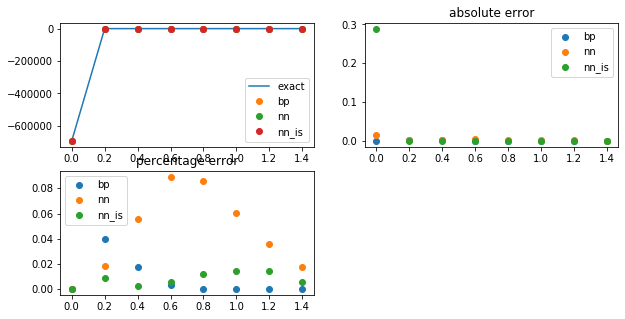

In [15]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

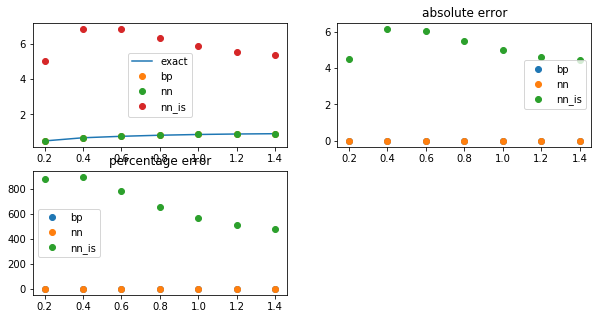

In [16]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

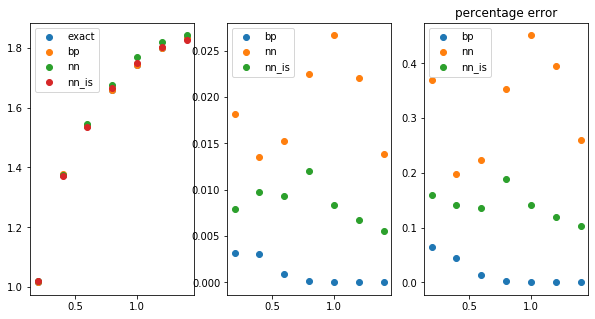

In [17]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

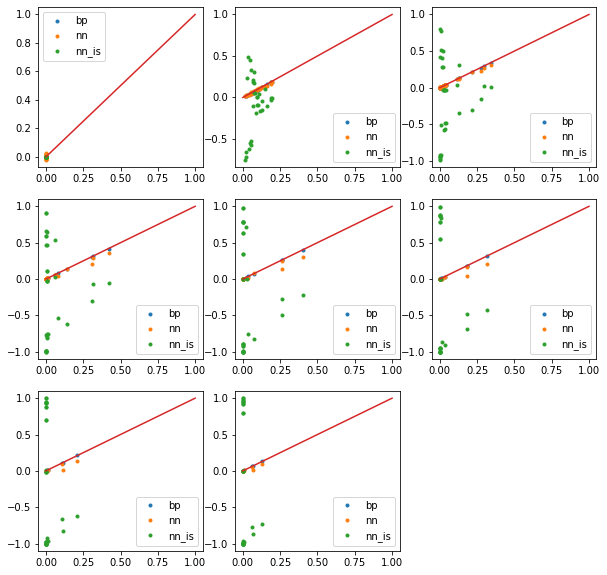

In [19]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas, res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

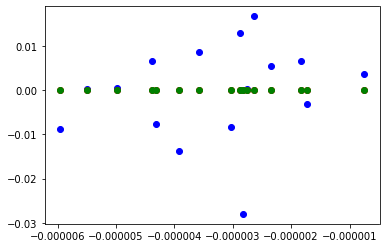

In [195]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")
